# 6 Sept 2017 - Evaluate 5 Machine Learning Model 

In [6]:
# Load Data
data(iris)

Explore data set. More specifically, to know certain features of the dataset, like:

1. Dimensions of the dataset.
2. Types of the attributes.
3. Details of the data.
4. Levels of the class attribute.
5. Analysis of the instances in each class.
6. Statistical summary of all attributes.

In [7]:
# see of how many instances (rows) and 
# how many attributes (columns) the data contains with the dim function. 
dim(iris)

[1] 150   5

In [3]:
#take a look at the first 5 rows of the data with:
tail(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species  
145 6.7          3.3         5.7          2.5         virginica
146 6.7          3.0         5.2          2.3         virginica
147 6.3          2.5         5.0          1.9         virginica
148 6.5          3.0         5.2          2.0         virginica
149 6.2          3.4         5.4          2.3         virginica
150 5.9          3.0         5.1          1.8         virginica

### Attributes

Knowing the types is important as it can help you summarize the data you have and possible transformations you might need to use to prepare the data before modeilng. 
They could be doubles, integers, strings, factors and other types. You can find it with:

In [4]:
sapply(iris, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

### Levels of the Class

The class variable is a factor that has multiple class labels or levels. Let’s look at the levels:


In [8]:
levels(iris$Species)

[1] "setosa"     "versicolor" "virginica"

### Class Distribution

Let’s look at the number of instances that belong to each class. We can view this as an absolute count and as a percentage with:


In [10]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

ERROR: Error in table(dataset$Species): object 'dataset' not found


In [9]:
percentage <- prop.table(table(iris$Species)) * 100
cbind(freq=table(iris$Species, percentage=percentage))

ERROR: Error in table(iris$Species, percentage = percentage): all arguments must have the same length


In [14]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

We now have a basic idea about the data. 
We need to extend that with some visualizations, and 
use two types of plots:  

Univariate Plots  
  

In [13]:
  x <- iris[,1:4]
  y <- iris[,5]

### Since the input variables are numeric, we can create box and whisker plots of each one with: 

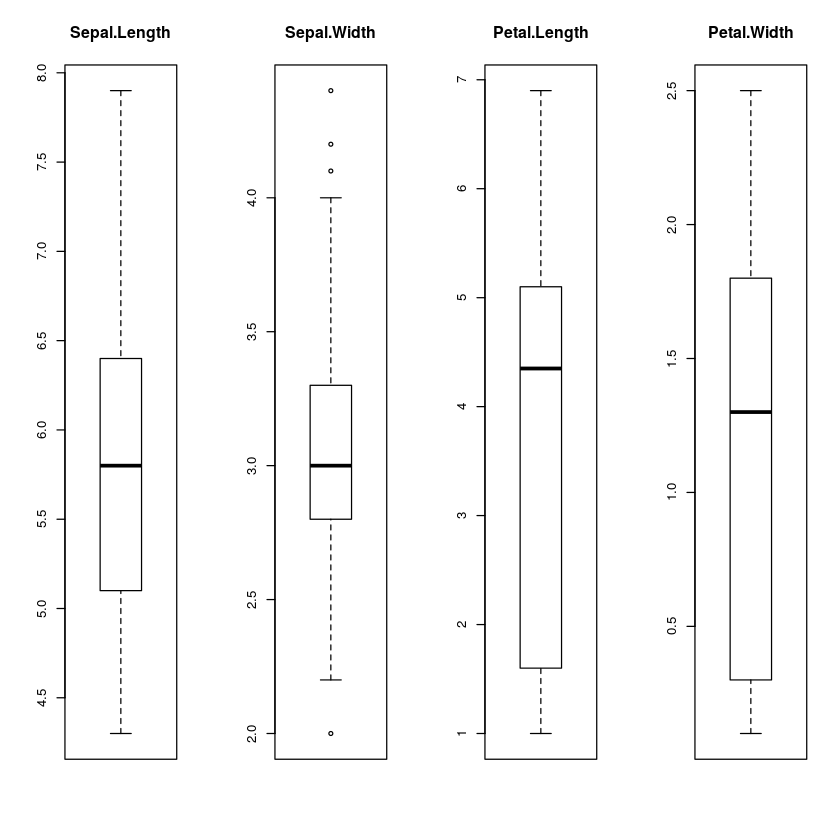

In [14]:
 par(mfrow=c(1,4))
  for(i in 1:4) {
    boxplot(x[,i], main=names(iris)[i])
  }

### To graphically display the class distribution, create a barplot of the Species class variable 
 

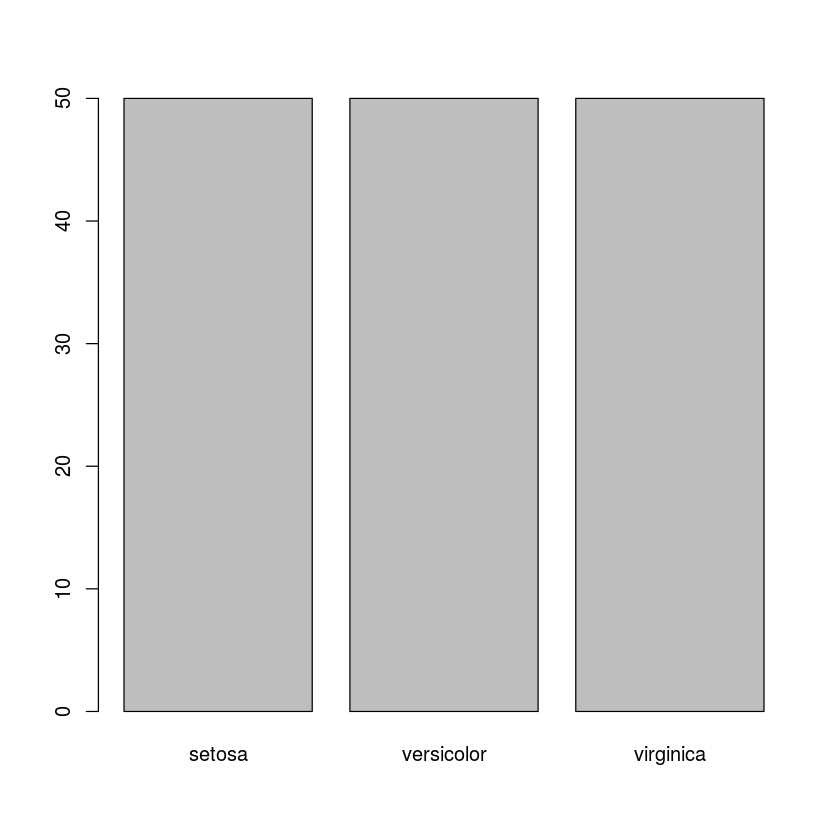

In [15]:
 plot(y) 

In [10]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [7]:
install.packages("ellipse")


Installing package into '/home/nbcommon/R'
(as 'lib' is unspecified)


In [8]:
library("ellipse")

In [16]:
featurePlot(x=x, y=y, plot="ellipse")

### To get an idea of the distribution of each attribute, use probability density plots to give smooth lines for each distribution.

In [17]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
  featurePlot(x=x, y=y, plot="density", scales=scales) 

# ALGORITHMS EVALUATION

  #### Create some models of the data and estimate their accuracy on unseen data.
  * Use the test harness to use 10-fold cross validation.
  * Build 5 different models to predict species from flower measurements.
  * Select the best model.

#### Using the metric of “Accuracy” to evaluate models. This is: (number of correctly predicted instances / divided by total no. of instances in the dataset)*100 to give a percentage.

In [18]:
control <- trainControl(method="cv", number=10)
  metric <- "Accuracy"

In [19]:
 library(rpart)
 library(kernlab)
 library(e1071)
 library(randomForest)


Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [22]:
   #  linear algorithms
   set.seed(7)
   fit.lda <- train(Species~., data=iris, method='lda', metric=metric,trControl=control)
   
   # CART
   set.seed(7)
   fit.cart <- train(Species~., data=iris, method="rpart", metric=metric, trControl=control)  
   
   # kNN
   set.seed(7)
   fit.knn <- train(Species~., data=iris, method="knn", metric=metric, trControl=control)
   
   # SVM
   set.seed(7)
   fit.svm <- train(Species~., data=iris, method="svmRadial", metric=metric, trControl=control)
   
   # Random Forest
   set.seed(7)
   fit.rf <- train(Species~., data=iris, method="rf", metric=metric, trControl=control)

In [23]:
# create a list of the created models and use the summary function.
   results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
   summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
       Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.8667  0.9500 1.0000 0.9733       1    1    0
cart 0.8000  0.9333 0.9333 0.9400       1    1    0
knn  0.8667  0.9500 1.0000 0.9733       1    1    0
svm  0.8000  0.9333 1.0000 0.9533       1    1    0
rf   0.8000  0.9333 1.0000 0.9600       1    1    0

Kappa 
     Min. 1st Qu. Median Mean 3rd Qu. Max. NA's
lda   0.8   0.925    1.0 0.96       1    1    0
cart  0.7   0.900    0.9 0.91       1    1    0
knn   0.8   0.925    1.0 0.96       1    1    0
svm   0.7   0.900    1.0 0.93       1    1    0
rf    0.7   0.900    1.0 0.94       1    1    0


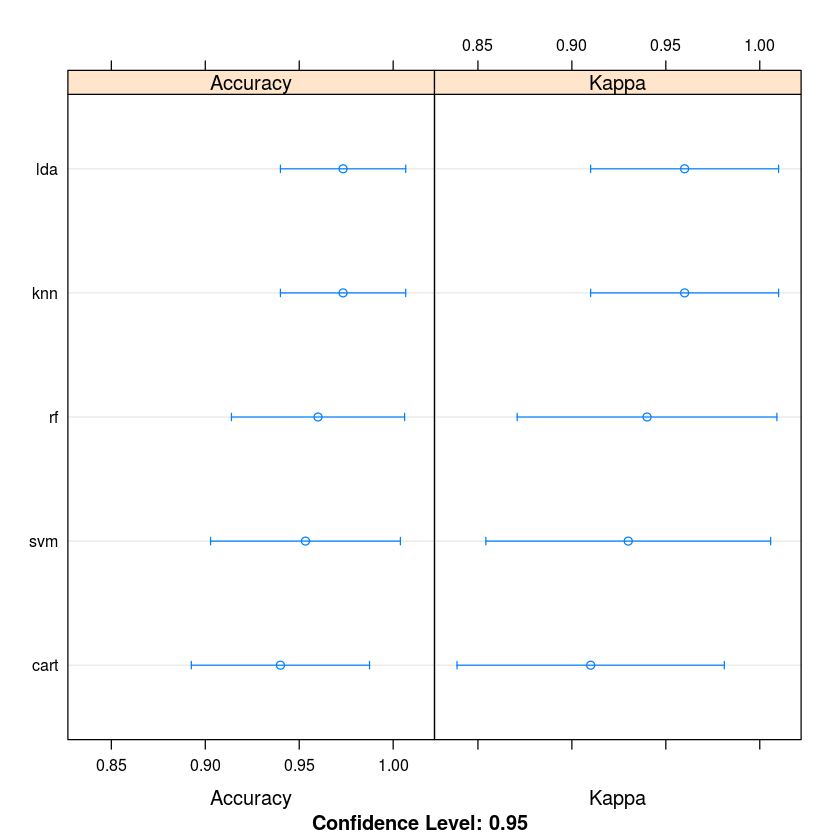

In [24]:
# Evaluated & plotted 5 algorithms model and estimate their accuracy on unseen data using “Accuracy” metric
   dotplot(results)

In [25]:
 #Make Predictions
   #The LDA was the most accurate model. 
   #To get an idea of the accuracy of the model on our validation set.
   #Run the LDA model directly on the validation set and summarize the results in a confusion matrix
   predictions <- predict(fit.lda, validation)
   confusionMatrix(predictions, validation$Species)

ERROR: Error in predict.train(fit.lda, validation): object 'validation' not found


# Thanks for Checking Out!

**Please send feedback (bugs, problems, suggestions) to [mryap@live.ie](mailto:mryap@live.ie)**.

or Tweet me at @mryap !

Cheers!

References : http://www.r-exercises.com/2017/08/25/machine-learning-tutorial/